In [16]:
!pip install tensorflow.keras

In [17]:
import tensorflow as tf
from tensorflow.keras import layers

# Generator (U-Net style)
def build_generator():
    inputs = tf.keras.Input(shape=[256, 256, 3])

    # Encoder
    down1 = layers.Conv2D(64, 4, strides=2, padding="same", activation="relu")(inputs)
    down2 = layers.Conv2D(128, 4, strides=2, padding="same", activation="relu")(down1)

    # Bottleneck
    bottleneck = layers.Conv2D(256, 4, strides=2, padding="same", activation="relu")(down2)

    # Decoder
    up1 = layers.Conv2DTranspose(128, 4, strides=2, padding="same", activation="relu")(bottleneck)
    up2 = layers.Conv2DTranspose(64, 4, strides=2, padding="same", activation="relu")(up1)

    outputs = layers.Conv2DTranspose(3, 4, strides=2, padding="same", activation="tanh")(up2)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Discriminator
def build_discriminator():
    input_img = tf.keras.Input(shape=[256, 256, 3])  # Sketch
    target_img = tf.keras.Input(shape=[256, 256, 3]) # Real or Fake photo

    x = layers.Concatenate()([input_img, target_img])
    x = layers.Conv2D(64, 4, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(128, 4, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(1, 4, strides=2, padding="same")(x)

    return tf.keras.Model(inputs=[input_img, target_img], outputs=x)

# Build models
generator = build_generator()
discriminator = build_discriminator()

print("Generator Summary:")
generator.summary()
print("Discriminator Summary:")
discriminator.summary()


Generator Summary:


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 64)   │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 64, 64, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 128, 128, 64)   │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 256, 256, 3)    │         3,075 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,507 (5.03 MB)

 Trainable params: 1,317,507 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

Discriminator Summary:


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 256, 256,  │          0 │ input_layer_7[0]… │
│ (Concatenate)       │ 6)                │            │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 128, 128,  │      6,208 │ concatenate_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 64, 64,    │    131,200 │ conv2d_16[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 32, 32, 1) │      2,049 │ conv2d_17[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 139,457 (544.75 KB)

 Trainable params: 139,457 (544.75 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# !unzip  "/content/archive (3).zip" -d data

In [3]:
file_path='/content/data'

In [4]:
import tensorflow as tf
import os

In [5]:


IMG_HEIGHT = 256
IMG_WIDTH = 256

def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image)
    image = tf.image.convert_image_dtype(image, tf.float32)  # normalize 0-1
    # Split image in half
    w = tf.shape(image)[1]
    w_half = w // 2
    input_image = image[:, :w_half, :]
    target_image = image[:, w_half:, :]
    # Resize just in case
    input_image = tf.image.resize(input_image, [IMG_HEIGHT, IMG_WIDTH])
    target_image = tf.image.resize(target_image, [IMG_HEIGHT, IMG_WIDTH])
    return input_image, target_image


In [6]:
import tensorflow as tf
import os

IMG_HEIGHT = 256
IMG_WIDTH = 256

def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image)
    image = tf.image.convert_image_dtype(image, tf.float32)  # normalize 0-1
    # Split image in half
    w = tf.shape(image)[1]
    w_half = w // 2
    input_image = image[:, :w_half, :]
    target_image = image[:, w_half:, :]
    # Resize just in case
    input_image = tf.image.resize(input_image, [IMG_HEIGHT, IMG_WIDTH])
    target_image = tf.image.resize(target_image, [IMG_HEIGHT, IMG_WIDTH])
    return input_image, target_image


def load_dataset(path, batch_size=16):
    files = sorted([os.path.join(path, f) for f in os.listdir(path)])
    dataset = tf.data.Dataset.from_tensor_slices(files)
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = load_dataset("/content/data/train")
val_dataset = load_dataset("/content/data/val")

In [1]:
from PIL import Image
import numpy as np
import os

def load_combined_images(folder, img_size=(256,256)):
    inputs = []
    targets = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            path = os.path.join(folder, filename)
            img = Image.open(path).resize((img_size[0]*2, img_size[1]))
            img = np.array(img)/127.5 - 1  # normalize to [-1,1]

            # split left and right
            input_img = img[:, :img_size[0], :]
            target_img = img[:, img_size[0]:, :]

            inputs.append(input_img)
            targets.append(target_img)
    return np.array(inputs), np.array(targets)

train_dir = '/content/data/train'
val_dir = '/content/data/val'

train_input, train_target = load_combined_images(train_dir)
val_input, val_target = load_combined_images(val_dir)

print("Train input shape:", train_input.shape)
print("Train target shape:", train_target.shape)

Train input shape: (1096, 256, 256, 3)
Train target shape: (1096, 256, 256, 3)


In [7]:
# import tensorflow as tf
# from tensorflow.keras import layers

# # ---------------- Generator ---------------- #
# def build_generator():
#     inputs = layers.Input(shape=[256,256,3])

#     # Encoder
#     down1 = layers.Conv2D(64, 4, strides=2, padding='same', activation='relu')(inputs)
#     down2 = layers.Conv2D(128, 4, strides=2, padding='same', activation='relu')(down1)
#     down3 = layers.Conv2D(256, 4, strides=2, padding='same', activation='relu')(down2)

#     # Decoder
#     up1 = layers.Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu')(down3)
#     up2= layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu')(up1)
#     up3 = layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(up2)


#     return tf.keras.Model(inputs=inputs, outputs=up3)

# # ---------------- Discriminator ---------------- #
# def build_discriminator():
#     inp = layers.Input(shape=[256,256,3])
#     tar = layers.Input(shape=[256,256,3])
#     x = layers.Concatenate()([inp, tar])

#     x = layers.Conv2D(64, 4, strides=2, padding='same', activation='relu')(x)
#     x = layers.Conv2D(128, 4, strides=2, padding='same', activation='relu')(x)
#     x = layers.Conv2D(256, 4, strides=2, padding='same', activation='relu')(x)
#     x = layers.Conv2D(1, 4, padding='same')(x)  # output patch

#     return tf.keras.Model(inputs=[inp, tar], outputs=x)

# # Initialize models
# generator = build_generator()
# discriminator = build_discriminator()
# print("Generator Summary:")
# generator.summary()
# print("Discriminator Summary:")
# discriminator.summary()


In [8]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(disc_real, disc_generated):
    real_loss = loss_object(tf.ones_like(disc_real), disc_real)
    generated_loss = loss_object(tf.zeros_like(disc_generated), disc_generated)
    return real_loss + generated_loss

def generator_loss(disc_generated, gen_output, target):
    adv_loss = loss_object(tf.ones_like(disc_generated), disc_generated)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    return adv_loss + (100 * l1_loss)  # L1 loss weighted


In [9]:
gen_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [10]:
@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real = discriminator([input_image, target], training=True)
        disc_generated = discriminator([input_image, gen_output], training=True)

        gen_loss = generator_loss(disc_generated, gen_output, target)
        disc_loss = discriminator_loss(disc_real, disc_generated)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    gen_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss


Generator prediction shape: (1, 256, 256, 3)
Generator prediction dtype: <dtype: 'float32'>


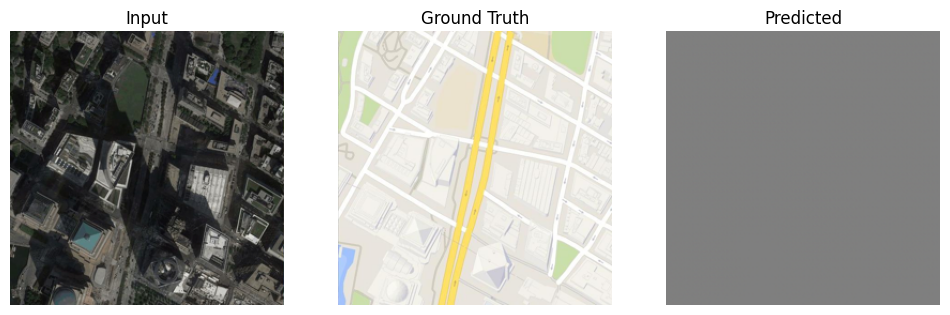

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow here
import numpy as np # Import numpy

def generate_images(model, test_input, target):
    prediction = model(test_input, training=False)
    print("Generator prediction shape:", prediction.shape) # Add print statement
    print("Generator prediction dtype:", prediction.dtype) # Add print statement

    plt.figure(figsize=(12,12))

    # Ensure display_list contains numpy arrays
    display_list = [test_input[0], target[0], prediction[0].numpy()]
    title = ['Input', 'Ground Truth', 'Predicted']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Ensure the image data is in the correct format and range for matplotlib
        # Convert from [-1, 1] to [0, 255] and cast to uint8
        img_to_display = ((display_list[i] + 1) / 2) * 255
        plt.imshow(img_to_display.astype(np.uint8))
        plt.axis('off')
    plt.show()

# Pick a sample from validation set
# Assuming val_input and val_target are loaded numpy arrays from cell j0npb9LXpUH-
if 'val_input' in locals() and 'val_target' in locals():
    # Take the first example from the validation set
    example_input = val_input[0:1]
    example_target = val_target[0:1] # Keep target as batch of 1 for consistency with model output

    # Ensure the generator model is defined and loaded
    if 'generator' in locals():
        generate_images(generator, example_input, example_target)
    else:
        print("Generator model is not defined. Please run the cell that defines the generator.")
else:
    print("Validation data (val_input, val_target) is not loaded. Please run the cell that loads the validation data.")

In [ ]:
train_input = (train_input / 127.5) - 1
train_target = (train_target / 127.5) - 1
val_input = (val_input / 127.5) - 1
val_target = (val_target / 127.5) - 1


In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import tensorflow as tf

def calculate_ssim(original, generated):
    # Ensure images are in the correct format and range for SSIM calculation
    # SSIM expects images in the range [0, 1] or [0, 255]
    # Our images are currently in [-1, 1], so we need to rescale them
    original_rescaled = (original + 1) / 2
    generated_rescaled = (generated + 1) / 2

    # SSIM requires images to be of the same data type.
    # Convert to float64 for ssim function compatibility if needed,
    # although float32 from model output is usually fine.
    original_rescaled = original_rescaled.astype(np.float32)
    generated_rescaled = generated_rescaled.astype(np.float32)


    # SSIM works best on grayscale images or with multichannel=True for color
    # Assuming color images with 3 channels
    return ssim(original_rescaled, generated_rescaled, multichannel=True, data_range=1.0, channel_axis=2)


# Select an example from the validation set to generate an image
# Assuming val_input and val_target are loaded numpy arrays from cell j0npb9LXpUH-
if 'val_input' in locals() and 'val_target' in locals():
    # Take the first example from the validation set
    example_input = val_input[0:1]
    example_target = val_target[0]

    # Generate an image using the generator model
    # Ensure the generator model is defined and loaded
    if 'generator' in locals():
        predicted_image = generator(example_input, training=False)[0]

        # Convert tensors to numpy arrays
        example_target_np = example_target
        predicted_image_np = predicted_image.numpy()

        # Calculate SSIM
        ssim_score = calculate_ssim(example_target_np, predicted_image_np)
        print(f"SSIM: {ssim_score}")
    else:
        print("Generator model is not defined. Please run the cell that defines the generator.")
else:
    print("Validation data (val_input, val_target) is not loaded. Please run the cell that loads the validation data.")